# Dados Sintéticos

In [54]:
from sklearn import datasets as ds
from sklearn import model_selection as ms
from sklearn import tree as tr
from sklearn import metrics as mt
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [13]:
n_samples=20000
n_features=2
n_informatives=2
n_redundant=0
random_state=0
#dataset
x, y = ds.make_classification( n_samples=n_samples,
                        n_features=n_features,
                        n_informative=n_informatives,
                        n_redundant=n_redundant,
                        random_state=random_state)
# production dataset
x, x_prod, y, y_prod = ms.train_test_split( x, y, test_size=0.2, random_state=random_state)

In [57]:
df = pd.DataFrame(x)
df.shape

(16000, 2)

# Não há separação dos dados

In [25]:
#define model
model = tr.DecisionTreeClassifier(max_depth=38)
#train
model.fit( x,y )
# classify data
yhat = model.predict(x)

acc = mt.accuracy_score( y, yhat)
print(f'Accuracy Over Training: {acc}')

Accuracy Over Training: 1.0


### Publicação do Modelo em Produção

In [27]:
yhat_prod = model.predict( x_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod)
print(f'Accuracy Over Production: {acc_prod}')

Accuracy Over Production: 0.85275


### Estratégia Treino-Teste

In [28]:
# Separa os dados em Treinamento e Teste
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2, random_state=random_state)

In [48]:
# Modelo treinado com os dados de treinamento
model = tr.DecisionTreeClassifier( max_depth=6)
model.fit(x_train, y_train )

# Classificação sobre os dados de teste
yhat_test = model.predict( x_test )
acc_test = mt.accuracy_score(y_test, yhat_test)

print(f'Accuracy Over test: {acc_test}')


Accuracy Over test: 0.886875


### Escolha dos parâmetros do algoritmo

In [50]:
values = [i for i in range(1,60)]
test_score = []
for i in values:
    # Modelo treinado com os dados de treinamento
    model = tr.DecisionTreeClassifier( max_depth=i)
    model.fit(x_train, y_train )

    # Classificação sobre os dados de teste
    yhat_test = model.predict( x_test )
    acc_test = mt.accuracy_score(y_test, yhat_test)
    test_score.append(acc_test)
max(test_score)


0.886875

In [51]:
test_score.index(max(test_score))

5

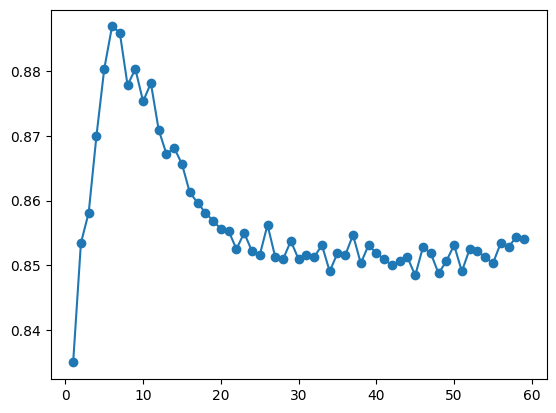

In [52]:
plt.plot(values, test_score, '-o', label='Test')

### Publicacao do algoritmo em Producao

In [56]:
# modelo treinado
model_last = tr.DecisionTreeClassifier( max_depth=6)
model_last.fit (np.concat((x_train, x_test)), np.concat((y_train,y_test)))
model_last.fit(x_train, y_train )

# Classificação sobre os dados de teste
yhat_prod = model_last.predict( x_prod )
acc_prod = mt.accuracy_score(y_prod, yhat_prod)

print(f'Accuracy Over test: {acc_prod}')

Accuracy Over test: 0.878


# Estratégia de Treino-Validação-Teste

In [58]:
# Separação entre treino e validação
x_train, x_val, y_train, y_val = ms.train_test_split( x_train, y_train, test_size=0.2 )

In [69]:
values = [i for i in range(1,60)]

val_score = []
for i in values:
    model = tr.DecisionTreeClassifier(max_depth=i)
    model.fit( x_train, y_train)
    # classify
    yhat_val = model.predict( x_val )
    acc_val = mt.accuracy_score(y_val, yhat_val )
    val_score.append(acc_val)

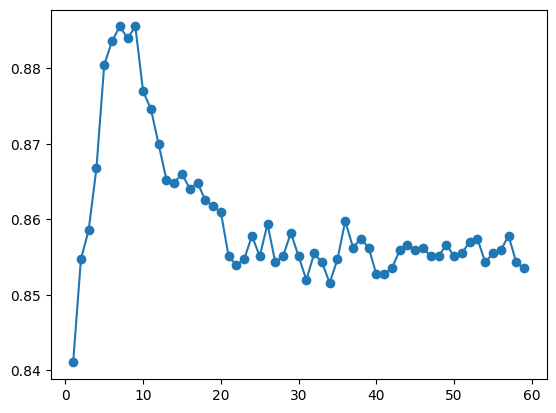

In [70]:
plt.plot(values, val_score, '-o', label='Validation')

In [64]:
val_score.index(max(val_score))

8

In [71]:
# Modelo treinado com os dados de treinamento
model = tr.DecisionTreeClassifier( max_depth=9)
model.fit(x_train, y_train )

# Classificação sobre os dados de teste
yhat_val = model.predict( x_val )
acc_val = mt.accuracy_score(y_val, yhat_val )

print(f'Accuracy Over validation: {acc_val}')


Accuracy Over validation: 0.884375


In [73]:
# Modelo treinado sobre training + validation
model_last = tr.DecisionTreeClassifier(max_depth=9)
model_last.fit(np.concat((x_train, x_val)), np.concat((y_train, y_val)))
# classify
yhat_test = model_last.predict(x_test)
acc_test = mt.accuracy_score(y_test, yhat_test)

print(f'Accuracy over test: {acc_test}')

Accuracy over test: 0.8803125


In [74]:
# classificaçao sobre os dados de teste
yhat_prod = model_last.predict( x_prod )
acc_prod = mt.accuracy_score(y_prod, yhat_prod)

print(f'Accuracy over production: {acc_prod}')



Accuracy over production: 0.87375
